Prim最小生成树为: 
1-->49: 0.14322065367721382
49-->9: 0.12379973512102682
1-->10: 0.14556052233819747
9-->79: 0.1606095156418727
79-->98: 0.12792618954109605
98-->37: 0.03984887793605343
10-->89: 0.24481588674900312
89-->47: 0.12996785654572318
47-->51: 0.1883122094925761
51-->100: 0.15793715684412116
100-->66: 0.09061104769577574
66-->93: 0.2347803608544692
93-->30: 0.1047974518946456
37-->78: 0.2565998397179457
78-->11: 0.07256128282732988
11-->60: 0.1644859616482907
60-->23: 0.15567549204656225
23-->56: 0.05281097545662862
56-->90: 0.08234862710129258
90-->65: 0.1839386347691415
65-->8: 0.21542443521052812
8-->91: 0.13978471631663988
91-->95: 0.1352419124650823
78-->59: 0.2488817235183147
59-->2: 0.1143410746955888
2-->7: 0.13276399254810942
7-->44: 0.0696997692654824
44-->20: 0.13341750766964025
20-->99: 0.09169198964821022
20-->3: 0.14208724575722245
99-->29: 0.15661025331574055
29-->55: 0.05747362000626156
55-->84: 0.05502114180483063
84-->40: 0.12897281486895945
40-->25: 0.1357838443

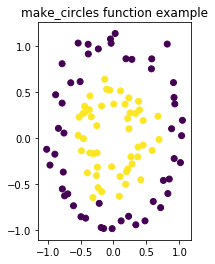

In [3]:
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

#最小生成树构建

class VertexMatrix(object):
    """
    定义图中的一个顶点    
    """
    def __init__(self,data):
        self.data=data
        self.info=None


#创建图
class Graph(object):
    """
    以邻接矩阵为存储结构创建无向图
    """
    
    def __init__(self,kind):
        #图的类型：无向图，有向图，无向网，有向网
        #kind:Undigraph, Digraph, Undinetwork, Dinetwork
        self.kind=kind
        self.vertexs=[] #顶点表
        self.arcs=[]  #边表，即邻接矩阵
        self.vexnum=0 #当前顶点数
        self.arcnum=0  #当前边（弧）数
        
    def CreateGraph(self,vertex_list,edge_list):
        """

        创建图
        ----------
        vertex_list : 
            顶点列表
        edge_list : 
            边列表

        Returns
        -------        

        """
        self.vexnum=len(vertex_list)
        self.arcnum=len(edge_list)
        for vertex in vertex_list:
            vertex = VertexMatrix(vertex) 
            self.vertexs.append(vertex) #顶点列表
            self.arcs.append([float('inf')]*self.vexnum) #邻接矩阵，初始化为无穷
        for edge in edge_list:
            ivertex=self.LocateVertex(edge[0])
            jvertex=self.LocateVertex(edge[1])
            weight=edge[2]
            self.InsertArc(ivertex,jvertex,weight)
        
    def LocateVertex(self,vertex):
        """
        

        定位顶点在邻接表中的位置
        ----------
        vertex : 
            
        Returns
        -------
        
        """
        index = 0
        while index < self.vexnum:
            if self.vertexs[index].data == vertex:
                return index
            else:
                index=index+1
    
    def InsertArc(self,ivertex,jvertex,weight):
        """
        创建邻接矩阵
        ----------
        ivertex 
        jvertex 
        weight 
        Returns
        -------
        
        """
        if self.kind == 'Undinetwork':
            self.arcs[ivertex][jvertex] = weight
            self.arcs[jvertex][ivertex] = weight
            
    
    def GetMin(self,closedge):
        """
        Prim算法——找到当前closedge中权值最小的边
        ----------
        closedge : 

        Returns
        -------
        
        """
        index = 0
        vertex = 0
        minweight = float('inf')
        while index < self.vexnum:
            if closedge[index][1] != 0 and closedge[index][1] < minweight:
                minweight = closedge[index][1]
                vertex = index
            index = index + 1
        return vertex
    
    def Prim(self,start_vertex):
        k = self.LocateVertex(start_vertex)
        closedge = []
        arc = []
        for index in range(self.vexnum):
            closedge.append([k,self.arcs[k][index]]) #初始化
        closedge[k][1] = 0 #起始点
        index = 1
        while index < self.vexnum:
            minedge = self.GetMin(closedge) #找到与下标k相连的边
            arc.append([self.vertexs[closedge[minedge][0]].data, self.vertexs[minedge].data, closedge[minedge][1]])
            #将当前权值最小的边加入最小生成树arc
            closedge[minedge][1]=0
            i=0
            #重新选择权值最小的边
            while i < self.vexnum:
                if self.arcs[minedge][i] < closedge[i][1]:
                    closedge[i] = [minedge, self.arcs[minedge][i]]
                i = i + 1
            index = index + 1
        return arc
    
    
    #Kruskal算法
    def AddEdges(self):
        """    
        将连通网中的边加入到列表AddEdges中
        Returns
        -------
        """
        edges = []
        i = 0
        while i < self.vexnum:
            j = 0
            while j < self.vexnum:
                if self.arcs[i][j] != float('inf'):
                    edges.append([self.vertexs[i].data, self.vertexs[j].data, self.arcs[i][j]])
                j = j + 1
            i = i+1
        #按权重从小到大进行排序
        return sorted(edges, key = lambda item:item[2])
    
    def Kruskal(self):
        edges = self.AddEdges()
        flags = []
        for index in range(self.vexnum):
            flags.append(index)
        index = 0
        while index < len(edges):
            ivertex = self.LocateVertex(edges[index][0])
            jvertex = self.LocateVertex(edges[index][1])
            if flags[ivertex] != flags[jvertex]:
                # 两个顶点不属于同一连通分量
                # 找到它们各自的连通分量的序号
                iflag=flags[ivertex]
                jflag=flags[jvertex]
                limit = 0
                while limit < self.vexnum:
                    if flags[limit] == jflag:
                        flags[limit] = iflag
                    limit = limit + 1
                index = index +1 
            else:
                edges.pop(index)
        return edges
    
                
#随机生成环形数据
np.random.seed(1234)
fig=plt.figure(1)
x1,y1=make_circles(n_samples=100,factor=0.5,noise=0.1)
plt.subplot(121)
plt.title('make_circles function example')
plt.scatter(x1[:,0],x1[:,1],marker='o',c=y1)

#np.linalg.norm(x1[0,:]-x1[1,:])


vertex_list=list(np.arange(1,len(y1)+1))
edge_list=[]
for i in range(len(x1)):
    for j in range(i+1,len(x1)):
        edge_list.append((i+1,j+1,np.linalg.norm(x1[i,:]-x1[j,:])))
        
if __name__ == '__main__':
    graph = Graph(kind='Undinetwork')
    graph.CreateGraph(vertex_list=vertex_list,
                      edge_list=edge_list)
    #起始位置的index为0
    mst1 = graph.Prim(vertex_list[0])
    print('Prim最小生成树为: ')
    for edge in mst1:
        print('{0}-->{1}: {2}'.format(edge[0], edge[1], edge[2]))
    
    mst2 = graph.Kruskal()
    print('Kruskal最小生成树为: ')
    for edge in mst2:
        print('{0}-->{1}: {2}'.format(edge[0], edge[1], edge[2]))


In [4]:
print(mst1)

[[1, 49, 0.14322065367721382], [49, 9, 0.12379973512102682], [1, 10, 0.14556052233819747], [9, 79, 0.1606095156418727], [79, 98, 0.12792618954109605], [98, 37, 0.03984887793605343], [10, 89, 0.24481588674900312], [89, 47, 0.12996785654572318], [47, 51, 0.1883122094925761], [51, 100, 0.15793715684412116], [100, 66, 0.09061104769577574], [66, 93, 0.2347803608544692], [93, 30, 0.1047974518946456], [37, 78, 0.2565998397179457], [78, 11, 0.07256128282732988], [11, 60, 0.1644859616482907], [60, 23, 0.15567549204656225], [23, 56, 0.05281097545662862], [56, 90, 0.08234862710129258], [90, 65, 0.1839386347691415], [65, 8, 0.21542443521052812], [8, 91, 0.13978471631663988], [91, 95, 0.1352419124650823], [78, 59, 0.2488817235183147], [59, 2, 0.1143410746955888], [2, 7, 0.13276399254810942], [7, 44, 0.0696997692654824], [44, 20, 0.13341750766964025], [20, 99, 0.09169198964821022], [20, 3, 0.14208724575722245], [99, 29, 0.15661025331574055], [29, 55, 0.05747362000626156], [55, 84, 0.0550211418048306

In [10]:
class das(object):

    #簇内紧密度
    def f_cd(self,mst1):
        W = 0
        for i in mst1:
            W += i[2]
        cd = W/len(mst1)
        return cd


    #欧氏距离
    def distEclud(vecA, vecB):
        return np.sqrt(np.sum(np.power((vecA - vecB), 2)))


    #簇间分离度
    def f_sd(self,x1,x2):#x1\x2是两个簇的位置集合
        sd=100
        for i in x1:
            for j in x2:
                dist = np.sqrt(np.sum(np.power((np.c_[x1] - np.c_[x1]), 2)))
                if dist < sd:
                    sd = dist
        return sd


    #聚类综合度
    def f_csd(self,):
        csd = (f_sd()-f_cd())/(f_sd()+f_cd())
        return csd



In [25]:
# min_dist=100
for i in range(len(x1)):
    for j in range(len(x1)):
        
        print(np.sqrt(np.sum(np.power((np.c_[x1] - np.c_[x1]), 2))))    

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [28]:
a=np.array([1,2])
b=np.array([2,3])
print(np.sqrt(np.sum(np.power((a - b), 2))))

1.4142135623730951


In [14]:
type(np.c_[mst1])

numpy.ndarray